## Overview - basic data functions

In this notebook, pandas is used to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA).

In [2]:
# import packages and libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Read in the 2018 lightning strike dataset

df = pd.read_csv("/Users/henryasiamah/Desktop/DSI Infinity/Google Advance Data Analytics/Topic_files/Exploratory Data Analysis/eda_using_basic_data_functions_in_python_dataset1.csv")

In [5]:
# first 10 rows
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [6]:
df.shape

(3401012, 3)

In [7]:
# get more information about the data, including data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [8]:
# converting the string date date using pandas datetime. 
df["date"] = pd.to_datetime(df["date"])

In [11]:
# checking the data types of the columns. 
df.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
dtype: object

In [17]:
df.groupby(["date"])[["number_of_strikes"]].sum().sort_values("number_of_strikes", ascending=False).head(10)

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


In [18]:
# create a new month column
df["month"] = df["date"].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [20]:
df.groupby(["month"])[["number_of_strikes"]].sum().sort_values("number_of_strikes", ascending = False)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


In [22]:
# changing month numbers to text
df["month_txt"] = df["date"].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


In [25]:
# create a helper dataframe for plotting.

df_by_month = df.groupby(["month","month_txt"])[["number_of_strikes"]].sum().sort_values("month", ascending=True).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


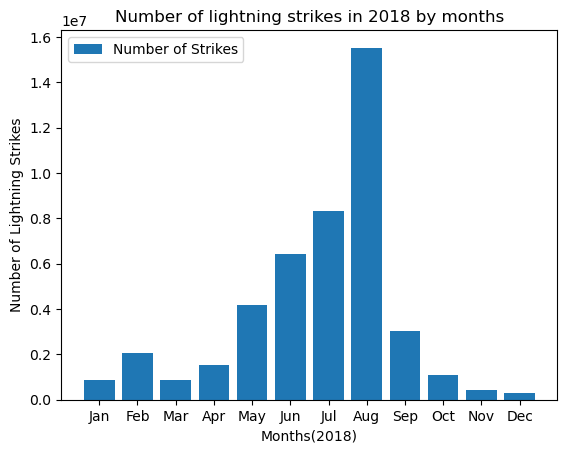

In [33]:
# make a bar chat to plot the graph

plt.bar(x=df_by_month["month_txt"], height = df_by_month["number_of_strikes"], label = "Number of Strikes")
#plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of Lightning Strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

# Date string manipulations with Python
## Calculating the quarterly lightning strike totals

Let's create four new columns: week, month, quarter, and year. We can do this by using the datetime.strftime() method of the datetime object. strftime is short for "string format time." We will use this method on the datetime data in the week column, and it will extract the information we specify, formatted as a string.To specify the information to extract, we will use strftime format codes.

In [49]:
df = pd.read_csv("/Users/henryasiamah/Desktop/DSI Infinity/Google Advance Data Analytics/Topic_files/Exploratory Data Analysis/manipulate_date_strings_with_python.csv")
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [50]:
# convert string date to pandas datetime

df["date"] = pd.to_datetime(df["date"])

In [51]:
# Create four new columns.
df["week"] = df["date"].dt.strftime('%Y-W%V')
df["month"] = df["date"].dt.strftime('%Y-%m')
df["quarter"] = df["date"].dt.to_period('Q').dt.strftime('%Y-Q%q')
df["year"] = df["date"].dt.strftime('%Y')

In [52]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   week               object        
 4   month              object        
 5   quarter            object        
 6   year               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 559.6+ MB


In [58]:
# Plot the number of weekly lightning strikes in 2018

df_by_week_2018 = df[df["year"] == '2018'].groupby(['week'])[["number_of_strikes"]].sum().reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


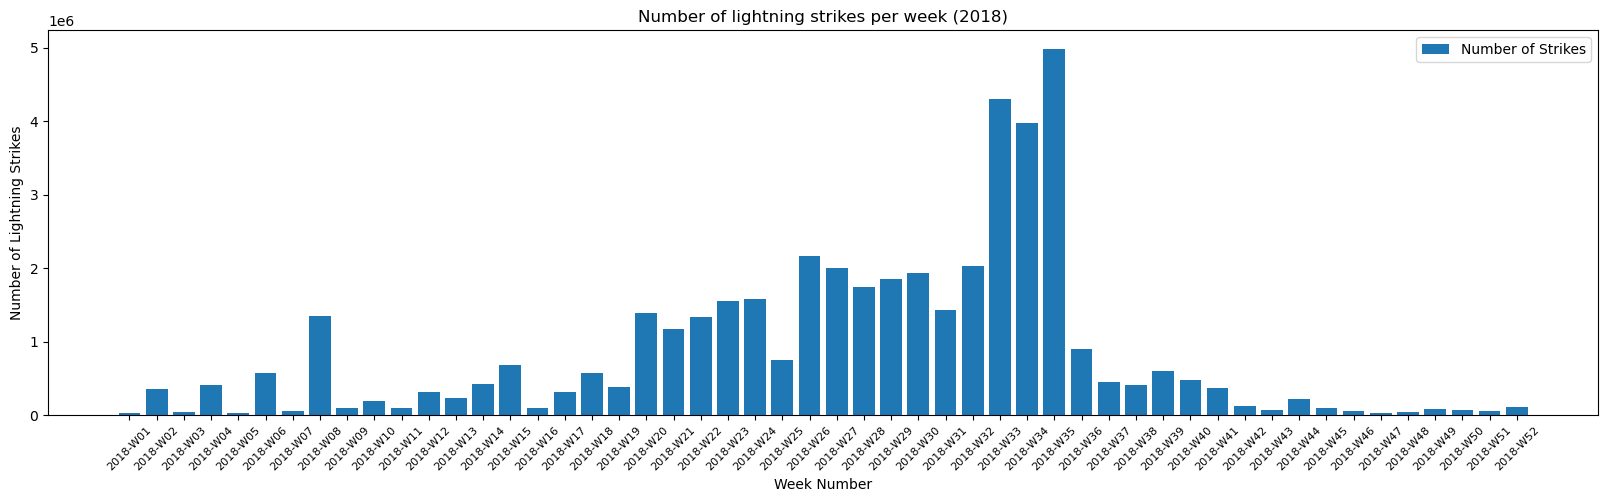

In [63]:
# Plot a bar graph of weekly strike totals in 2018.
plt.figure(figsize = (20, 5)) # increase output size. optional if x labels are not a lot.
plt.bar(x=df_by_week_2018["week"], height=df_by_week_2018["number_of_strikes"], label = "Number of Strikes")
plt.plot()
plt.xlabel("Week Number")
plt.ylabel("Number of Lightning Strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.legend()
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

Plot the number of quarterly lightning strikes from 2016–2018. plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. 

In [64]:
df_by_quarter = df["number_of_strikes"].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well. Let's begin by grouping the data by quarter and summing.
Then, we will create a number_of_strikes_formatted column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [67]:
# Gropu 2016-2018 data bt quarter and sum 

df_by_quarter = df.groupby(['quarter'])[["number_of_strikes"]].sum().reset_index()

# format text as millions
df_by_quarter["number_of_strikes_formatted"] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


 Let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses plt.text(), which is a pyplot function whose positional arguments are x, y, and s. x represents the x-axis coordinates, y represents the y-axis coordinates, and s represents the text that we want to appear at these coordinates.

In [69]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

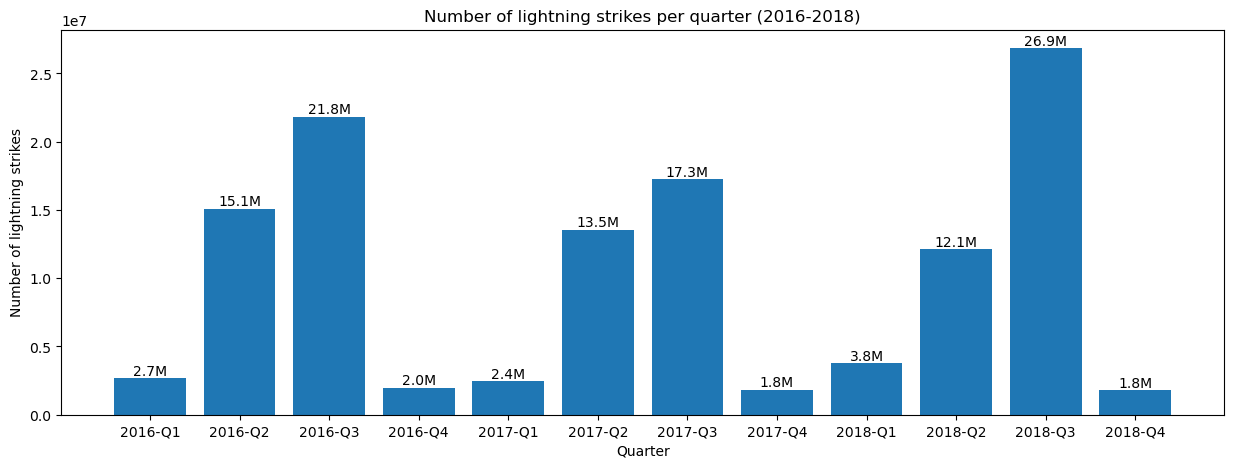

In [74]:
# Plot the graph
plt.figure(figsize = (15, 5))
plt.bar(x=df_by_quarter["quarter"], height=df_by_quarter["number_of_strikes"])
addlabels(df_by_quarter["quarter"], df_by_quarter["number_of_strikes"], df_by_quarter["number_of_strikes_formatted"])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

Create a grouped bar chart to better compare year-over-year changes each quarter. We can do this by creating two new columns that break out the quarter and year from the quarter column. We will use the quarter column and take the last two characters to get quarter_number, and take the first four characters to get year.

In [75]:
df_by_quarter["quarter_number"] = df_by_quarter["quarter"].str[-2:]
df_by_quarter["year"] = df_by_quarter["quarter"].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


Creaate a bar graph and fill in the chart parameters

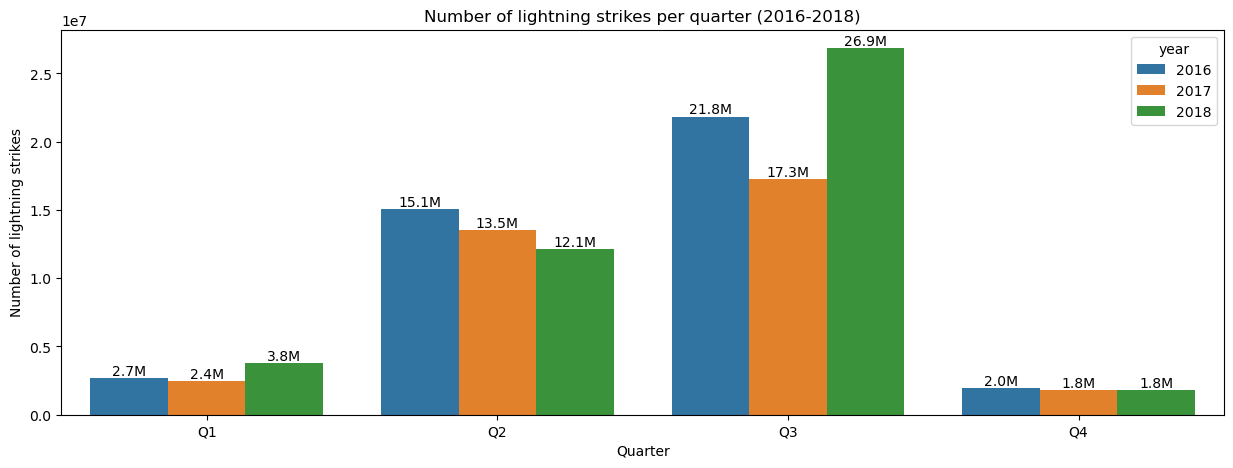

In [79]:
import seaborn as sns
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

## Conclusion

There have been an increase lightning from 2016 to 2018 except for the fourth quarter of 2018 where all the data was not gotten. Throughout the quarters, 2018 had the highest number of lightning strikes at 3.8M and 26.9M in Q1 and Q3 respectively , 2016 at 15.1 in Q2. All years recorded very low lightining strikes in the fourth quarter at 2.0M approximately.  